__*Class*__: Text Minig[BAT54201]

__*Professor*__: Lee, Junghye

__*Team*__: DW(Don't Worry)

__*Member*__: Cha, Ukhyeon(20176022) / Lee, Doyeon(20176026)

## Introduction and Goal

This task is to understand pLSA and EM algorithms.

- Understand the algorithm and implement it yourself.

- Create a class using the functions created in Assignment 1. Becase of programformating compile.

We will attatch doucments handwritten 'Derive PLSA'.

## Environment Setting

In [1]:
# External API
import os
import sys
import numpy as np
import glob
import matplotlib.pyplot as plt

# Part of External API
from string import punctuation
from operator import itemgetter
from pandas import Series, DataFrame

# Own code API
import TextminingPlsa
from utils import normalize
from stopwords import stopwords
from replacer import RegexpReplacer

## Process

*The Part of Preprocessing Class in Python*

#### Initialization

In [2]:
corpus = TextminingPlsa.Corpus()  # instantiate corpus
document_paths = ['./test/']

>Function of making a corpus

In [3]:
def create_corpus(self):
    symbols = punctuation.replace('\'', '')
    self.file = open(self.filepath)
    try:
        #self.lines = [line for line in self.file]
        content = self.file.read().strip()
        for symbol in symbols:
            content = content.replace(symbol, '')
        self.words = self.words + content.split()

    finally:
        self.file.close()

    return self.words

In [4]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)  # instantiate document

./test\k1.txt
./test\k2.txt
./test\k3.txt
./test\k4.txt
./test\k5.txt
./test\N1.txt
./test\N2.txt
./test\N3.txt
./test\N4.txt
./test\N5.txt


In [5]:
print("Length of corpus: ",len(document.create_corpus()))

Length of corpus:  802


In [6]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)
        print(document.create_corpus()[:10])

./test\k1.txt
['South', 'Korean', 'adults', 'run', 'the', 'risk', 'of', 'chronic', 'diseases', 'due']
./test\k2.txt
['A', 'local', 'research', 'team', 'has', 'discovered', 'a', 'form', 'of', 'nanostructure']
./test\k3.txt
['Some', '41', 'percent', 'of', 'adult', 'men', 'are', 'overweight', 'much', 'higher']
./test\k4.txt
['While', 'millions', 'of', 'people', 'die', 'of', 'hunger', 'in', 'developing', 'countries']
./test\k5.txt
['The', 'term', 'babyface', 'has', 'far', 'wider', 'connotations', 'in', 'the', 'modern']
./test\N1.txt
['In', 'response', 'to', 'growing', 'consumer', 'frustration', 'over', 'drug', 'prices', 'UnitedHealthcare']
./test\N2.txt
['On', 'Sunday', 'The', 'Times', 'published', 'a', 'heartbreaking', 'story', 'about', 'a']
./test\N3.txt
['In', 'the', 'wake', 'of', 'the', 'horrific', 'school', 'shootings', 'in', 'Parkland']
./test\N4.txt
['When', 'The', 'New', 'York', 'Times', 'hired', 'me', 'to', 'write', 'about']
./test\N5.txt
["It's", 'the', 'No', '2', 'killer', 'amon

>Function of spliting apostrophe

In [7]:
def unset_apostrophe(self):
    """
    This function needs to import RegexpReplacer.
    """
    replacer = RegexpReplacer()

    self.unset_apostrophe_list = []

    for element in self.words:
        temp_elem = replacer.replace(element).split()
        self.unset_apostrophe_list.append(temp_elem.replace('\'', ''))

    return self.unset_apostrophe_list

In [8]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)
        document.create_corpus()
        print(document.unset_apostrophe()[:10])

./test\k1.txt
['South', 'Korean', 'adults', 'run', 'the', 'risk', 'of', 'chronic', 'diseases', 'due']
./test\k2.txt
['A', 'local', 'research', 'team', 'has', 'discovered', 'a', 'form', 'of', 'nanostructure']
./test\k3.txt
['Some', '41', 'percent', 'of', 'adult', 'men', 'are', 'overweight', 'much', 'higher']
./test\k4.txt
['While', 'millions', 'of', 'people', 'die', 'of', 'hunger', 'in', 'developing', 'countries']
./test\k5.txt
['The', 'term', 'babyface', 'has', 'far', 'wider', 'connotations', 'in', 'the', 'modern']
./test\N1.txt
['In', 'response', 'to', 'growing', 'consumer', 'frustration', 'over', 'drug', 'prices', 'UnitedHealthcare']
./test\N2.txt
['On', 'Sunday', 'The', 'Times', 'published', 'a', 'heartbreaking', 'story', 'about', 'a']
./test\N3.txt
['In', 'the', 'wake', 'of', 'the', 'horrific', 'school', 'shootings', 'in', 'Parkland']
./test\N4.txt
['When', 'The', 'New', 'York', 'Times', 'hired', 'me', 'to', 'write', 'about']
./test\N5.txt
['It is', 'the', 'No', '2', 'killer', 'amo

>Function of changing lower characters

In [9]:
def lower_text(self):
    """
    Converts the text of all imported files to lowercase.
    """
    self.lower_corpus_list = []

    for char in self.unset_apostrophe_list:
        lower_character = char.lower()
        self.lower_corpus_list.append(lower_character)

    return self.lower_corpus_list

In [10]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)
        document.create_corpus()
        document.unset_apostrophe()
        print(document.lower_text()[:10])

./test\k1.txt
['south', 'korean', 'adults', 'run', 'the', 'risk', 'of', 'chronic', 'diseases', 'due']
./test\k2.txt
['a', 'local', 'research', 'team', 'has', 'discovered', 'a', 'form', 'of', 'nanostructure']
./test\k3.txt
['some', '41', 'percent', 'of', 'adult', 'men', 'are', 'overweight', 'much', 'higher']
./test\k4.txt
['while', 'millions', 'of', 'people', 'die', 'of', 'hunger', 'in', 'developing', 'countries']
./test\k5.txt
['the', 'term', 'babyface', 'has', 'far', 'wider', 'connotations', 'in', 'the', 'modern']
./test\N1.txt
['in', 'response', 'to', 'growing', 'consumer', 'frustration', 'over', 'drug', 'prices', 'unitedhealthcare']
./test\N2.txt
['on', 'sunday', 'the', 'times', 'published', 'a', 'heartbreaking', 'story', 'about', 'a']
./test\N3.txt
['in', 'the', 'wake', 'of', 'the', 'horrific', 'school', 'shootings', 'in', 'parkland']
./test\N4.txt
['when', 'the', 'new', 'york', 'times', 'hired', 'me', 'to', 'write', 'about']
./test\N5.txt
['it is', 'the', 'no', '2', 'killer', 'amo

>Function of removing stopwords

In [11]:
def remove_stopword(self):
    """
    This function needs to import stopwords.
    Stopwords can be added or removed.
    """
    self.final_list = self.lower_corpus_list.copy()

    for word in self.lower_corpus_list:
        if word in stopwords:
            self.final_list.remove(word)

    return self.final_list

In [12]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)
        document.create_corpus()
        document.unset_apostrophe()
        document.lower_text()
        predoc = document.remove_stopword()
        print(predoc[:10])

./test\k1.txt
['south', 'korean', 'adults', 'run', 'risk', 'chronic', 'diseases', 'due', 'unhealthy', 'diet']
./test\k2.txt
['local', 'discovered', 'form', 'nanostructure', 'potential', 'later', 'applications', 'cancer', 'treatment', 'joint']
./test\k3.txt
['41', 'adult', 'men', 'overweight', 'much', 'higher', '24', 'women', 'according', 'obesity']
./test\k4.txt
['die', 'hunger', 'developing', 'countries', 'genetically', 'modified', 'organisms', 'essential', 'tool', 'fight']
./test\k5.txt
['term', 'babyface', 'far', 'wider', 'connotations', 'modern', 'era', 'nickname', 'boxers', 'legendary']
./test\N1.txt
['response', 'growing', 'consumer', 'frustration', 'drug', 'prices', 'unitedhealthcare', 'one', 'nation is', 'largest']
./test\N2.txt
['heartbreaking', 'standout', 'student', 'williams', 'later', 'developed', 'mental', 'problems', 'ended', 'homeless']
./test\N3.txt
['wake', 'horrific', 'school', 'shootings', 'parkland', 'fla', 'trump', 'repeatedly', 'building', 'reopening']
./test\N4.

*The Part of Algorithm Class in Python*

>Adding to corpus

In [13]:
def add_document(self, document):
    '''
    Add a document to the corpus.
    '''
    self.documents.append(document)

In [14]:
for document_path in document_paths:
    for document_file in glob.glob(os.path.join(document_path, '*.txt')):
        print(document_file)
        document = TextminingPlsa.PreprocessingCorpus(document_file)
        document.create_corpus()
        document.unset_apostrophe()
        document.lower_text()
        predoc = document.remove_stopword()
        predoc

        corpus.add_document(predoc)  # push onto corpus documents list
        print(corpus)

./test\k1.txt
./test\k2.txt
./test\k3.txt
./test\k4.txt
./test\k5.txt
./test\N1.txt
./test\N2.txt
./test\N3.txt
./test\N4.txt
./test\N5.txt


>Function of making a unique vocabulary

In [15]:
def build_vocabulary(self):
    '''
    Construct a list of unique words in the corpus.
    '''
    discrete_set = set()
    for document in self.documents:
        for word in document:
            discrete_set.add(word)
    self.vocabulary = list(discrete_set)

    return self.vocabulary

In [16]:
print(corpus.build_vocabulary()[:30])

['pursued', 'swayed', 'employment', 'friend', 'unitedhealthcare is', 'building', 'deflect', 'depends', 'longerterm', 'torrey', 'argue', '520', 'back', '50', 'united', 'provision', 'bank', 'else', 'obesity', 'apartment', 'wellpracticed', 'europe', 'womans', 'brown', 'articles', 'advocacy', 'gained', 'america is', 'brought', 'founded']


>Implemetation of EM algorithm

In [17]:
def plsa(self, number_of_topics, max_iter):

    '''
    Model topics.
    '''
    print("EM iteration begins...")
    # Get vocabulary and number of documents.
    self.build_vocabulary()
    number_of_documents = len(self.documents)
    vocabulary_size = len(self.vocabulary)

    # build term-doc matrix
    self.term_doc_matrix = np.zeros([number_of_documents, vocabulary_size], dtype=np.int)
    for d_index, doc in enumerate(self.documents):
        term_count = np.zeros(vocabulary_size, dtype=np.int)
        for word in doc:
            if word in self.vocabulary:
                w_index = self.vocabulary.index(word)
                term_count[w_index] += 1
        self.term_doc_matrix[d_index] = term_count

    # Create the counter arrays.
    self.document_topic_prob = np.zeros([number_of_documents, number_of_topics], dtype=np.float)  # P(z | d)
    self.topic_word_prob = np.zeros([number_of_topics, len(self.vocabulary)], dtype=np.float)  # P(w | z)
    self.topic_prob = np.zeros([number_of_documents, len(self.vocabulary), number_of_topics], dtype=np.float)  # P(z | d, w)

    # Initialize
    print("Initializing...")
    # randomly assign values
    self.document_topic_prob = np.random.random(size=(number_of_documents, number_of_topics))
    for d_index in range(len(self.documents)):
        normalize(self.document_topic_prob[d_index])  # normalize for each document
    self.topic_word_prob = np.random.random(size=(number_of_topics, len(self.vocabulary)))
    for z in range(number_of_topics):
        normalize(self.topic_word_prob[z])  # normalize for each topic

    # Run the EM algorithm
    temp = 0
    word_prob_dist= []
    topic_prob_dist = []
    for iteration in range(max_iter):
        print("Iteration #" + str(iteration + 1) + "...")
        #print("===E step===")
        for d_index, document in enumerate(self.documents):
            for w_index in range(vocabulary_size):
                prob = self.document_topic_prob[d_index, :] * self.topic_word_prob[:, w_index]
                if sum(prob) == 0.0:
                    print("d_index = " + str(d_index) + ",  w_index = " + str(w_index))
                    print("self.document_topic_prob[d_index, :] = " + str(self.document_topic_prob[d_index, :]))
                    print("self.topic_word_prob[:, w_index] = " + str(self.topic_word_prob[:, w_index]))
                    print("topic_prob[d_index][w_index] = " + str(prob))
                    exit(0)
                else:
                    normalize(prob)
                self.topic_prob[d_index][w_index] = prob
        #print(self.topic_prob.shape)

        #print("===M step===")
        # update P(w | z); word-distribution
        for z in range(number_of_topics):
            for w_index in range(vocabulary_size):
                s = 0
                for d_index in range(len(self.documents)):
                    count = self.term_doc_matrix[d_index][w_index]
                    s = s + count * self.topic_prob[d_index, w_index, z]
                self.topic_word_prob[z][w_index] = s
            normalize(self.topic_word_prob[z])
        #print(self.topic_word_prob.shape)

        # update P(z | d); lamda(coverage)
        for d_index in range(len(self.documents)):
            for z in range(number_of_topics):
                s = 0
                for w_index in range(vocabulary_size):
                    count = self.term_doc_matrix[d_index][w_index]
                    s = s + count * self.topic_prob[d_index, w_index, z]
                self.document_topic_prob[d_index][z] = s
            normalize(self.document_topic_prob[d_index])
        #print(self.document_topic_prob.shape)


        if abs(self._loglikelihood() - temp) < 0.0001:
            break
        else:
            temp = self._loglikelihood()
            self.listLoglikelihood.append(temp)
            word_prob_dist.append(self.topic_word_prob)
            topic_prob_dist.append(self.document_topic_prob)

    return (self.listLoglikelihood, word_prob_dist, topic_prob_dist)

In [18]:
result = corpus.plsa(number_of_topics=3, max_iter=100)

EM iteration begins...
Initializing...
Iteration #1...
Iteration #2...
Iteration #3...
Iteration #4...
Iteration #5...
Iteration #6...
Iteration #7...
Iteration #8...
Iteration #9...
Iteration #10...
Iteration #11...
Iteration #12...
Iteration #13...
Iteration #14...
Iteration #15...
Iteration #16...
Iteration #17...
Iteration #18...
Iteration #19...
Iteration #20...
Iteration #21...
Iteration #22...
Iteration #23...
Iteration #24...


>Calculating of Log-Likelihood

In [19]:
def _loglikelihood(self):

    log_value = np.log(np.dot(self.document_topic_prob, self.topic_word_prob))
    cGivenlamda = self.term_doc_matrix * log_value
    sumLoglikelihood = 0
    for iter in range(len(self.vocabulary)):
        sumLoglikelihood += sum(cGivenlamda)[iter,]

    return sumLoglikelihood

>Visualization of the value of Log-Likelihood

In [20]:
def visualization_likelihod(value_list):
    
    plt.plot(value_list, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")
    
    plt.xlabel('$Iteration$', fontsize=14)
    plt.title('Log-Likelihood for Optimization', fontsize=20)
    plt.ylabel('$Value$', fontsize=14)
    plt.tight_layout()
    plt.show()

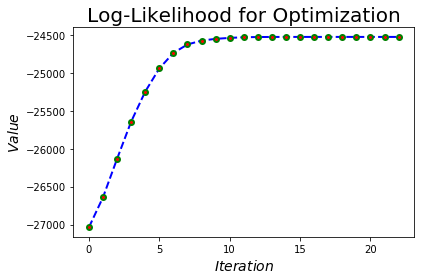

In [21]:
visualization_likelihod(result[0])

>Result of Summary

In [22]:
word_topic = DataFrame(result[1][0].reshape([1930,3]))
word_topic.index = corpus.build_vocabulary()
word_topic.columns = ['Topic1', 'Topic2', 'Topic3']

print(word_topic.shape)
word_topic

(1930, 3)


,Topic1,Topic2,Topic3
pursued,3.916862e-70,8.014609e-128,1.301442e-68
swayed,1.288697e-196,2.299546e-91,7.200265e-68
employment,1.242305e-91,4.243206e-130,1.349714e-67
friend,1.480998e-68,6.747030e-91,2.396932e-83
unitedhealthcare is,1.566290e-70,1.248439e-03,1.248439e-03
building,9.632582e-197,2.547568e-96,1.213727e-69
deflect,8.739076e-03,1.032657e-196,6.532997e-129
depends,5.514767e-68,5.549857e-108,1.938838e-128
longerterm,1.248439e-03,3.915988e-69,8.243440e-128
torrey,1.248439e-03,8.609882e-197,8.099969e-69


In [23]:
np.sum(word_topic, axis=0)

Topic1    1.028039
Topic2    0.957011
Topic3    1.014950
dtype: float64

In [24]:
topic_doc = DataFrame(result[2][0].reshape(3,10))
topic_doc.index = ['Topic1', 'Topic2', 'Topic3']
topic_doc.columns = ['Doucment1','Document2', 'Document3',
                   'Document4','Document5', 'Document6',
                   'Document7','Document8', 'Document9', 'Document10']

print(topic_doc.shape)
topic_doc

(3, 10)


,Doucment1,Document2,Document3,Document4,Document5,Document6,Document7,Document8,Document9,Document10
Topic1,1.306839e-07,8.902960e-10,9.999999e-01,3.115586e-10,2.437751e-11,1.000000e+00,1.000000e+00,4.590987e-19,3.034947e-19,1.000000e+00
Topic2,7.573748e-15,3.624325e-15,1.295509e-10,1.000000e+00,3.708817e-12,1.923875e-10,4.423277e-13,1.000000e+00,5.947763e-18,1.000000e+00
Topic3,3.880155e-12,2.341895e-09,9.209882e-08,9.999999e-01,6.064544e-13,1.000000e+00,7.439244e-12,1.000000e+00,3.456818e-15,6.972458e-15


In [25]:
np.sum(topic_doc, axis=0)

Doucment1     1.306878e-07
Document2     3.232195e-09
Document3     1.000000e+00
Document4     2.000000e+00
Document5     2.869278e-11
Document6     2.000000e+00
Document7     1.000000e+00
Document8     2.000000e+00
Document9     3.463069e-15
Document10    2.000000e+00
dtype: float64

In [26]:
print(len(result[1][0][0]))

1930


In [27]:
word_data ={
    '0.Word':[corpus.build_vocabulary()[0],corpus.build_vocabulary()[1],corpus.build_vocabulary()[2],'Log-Likelihood'],
    '01.Iteration_P(w|topic1)': [result[1][0][0][0],result[1][0][0][1],result[1][0][0][2],result[0][1]],
    '02.Iteration_P(w|topic1)': [result[1][1][0][0],result[1][1][0][1],result[1][1][0][2],result[0][2]],
    '03.Iteration_P(w|topic1)': [result[1][2][0][0],result[1][2][0][1],result[1][2][0][2],result[0][3]],
    '10.Iteration.....': ['-','-','-','-'],
    '25.Iteration_P(w|topic1)': [result[1][-3][0][0],result[1][-3][0][1],result[1][-3][0][2],result[0][-3]],
    '26.Iteration_P(w|topic1)': [result[1][-2][0][0],result[1][-2][0][1],result[1][-2][0][2],result[0][-2]],
    '27.Iteration_P(w|topic1)': [result[1][-1][0][0],result[1][-1][0][1],result[1][-1][0][2],result[0][-1]],
    }

In [28]:
result2_data = DataFrame(word_data)
result2_data

,0.Word,01.Iteration_P(w|topic1),02.Iteration_P(w|topic1),03.Iteration_P(w|topic1),10.Iteration.....,25.Iteration_P(w|topic1),26.Iteration_P(w|topic1),27.Iteration_P(w|topic1)
0,pursued,3.916862e-70,3.916862e-70,3.916862e-70,-,3.916862e-70,3.916862e-70,3.916862e-70
1,swayed,8.014609e-128,8.014609e-128,8.014609e-128,-,8.014609e-128,8.014609e-128,8.014609e-128
2,employment,1.301442e-68,1.301442e-68,1.301442e-68,-,1.301442e-68,1.301442e-68,1.301442e-68
3,Log-Likelihood,-2.664017e+04,-2.613215e+04,-2.564053e+04,-,-2.452203e+04,-2.452203e+04,-2.452203e+04


## Limits & Futher

- We could not think about the background.

- There is an error in preprocessing. (apostrophe: The string was not splited.)

- Constraint about pi ($P(z|d)$) NOT satisfied 

## Reference

*For more information, please refer to the following references and soft copy.*

>reference[[1]] [site1] PLSA in github
[site1]: https://github.com/hitalex/PLSA

>reference[[2]] [site2] Understanding for PLSA (blog)
[site2]: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/05/25/plsa/

*- End of Document -* 

-------------------------------

## Overall code (included class of Python)

### TextminingPlsa.py

In [29]:
import re
import sys
import numpy as np

from string import punctuation
from utils import normalize
from stopwords import stopwords
from replacer import RegexpReplacer

"""
Author: 
Chris Cha (https://github.com/ryan-chris)
Reference:
https://github.com/hitalex
"""


def progressBar(value, endvalue, bar_length=20):
    percent = float(value) / endvalue
    arrow = '-' * int(round(percent * bar_length) - 1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write("\rPercent: [{0}] {1}%".format(arrow + spaces, int(round(percent * 100))))
    sys.stdout.flush()

class PreprocessingCorpus(object):

    def __init__(self, filepath):
        self.filepath = filepath
        self.lines = []
        self.words = []

    def create_corpus(self):
        '''
        Create a corpus from document.
        '''
        symbols = punctuation.replace('\'', '')
        self.file = open(self.filepath)
        try:
            #self.lines = [line for line in self.file]
            content = self.file.read().strip()
            for symbol in symbols:
                content = content.replace(symbol, '')
            self.words = self.words + content.split()

        finally:
            self.file.close()

        return self.words
    """
    def create_corpus(self):

        # When it reads files, removes all special symbols, including punctuation marks.
        symbols = punctuation.replace('\'', '')

        for filename in self.filepath:
            with open(filename) as file:
                content = file.read().strip()
                for symbol in symbols:
                    content = content.replace(symbol, '')
                self.words = self.words + content.split()

        return self.words
    """

    def lower_text(self):
        """
        Converts the text of all imported files to lowercase.
        """
        self.lower_corpus_list = []

        for char in self.unset_apostrophe_list:
            lower_character = char.lower()
            self.lower_corpus_list.append(lower_character)

        return self.lower_corpus_list

    def unset_apostrophe(self):
        """
        This function needs to import RegexpReplacer.
        """
        replacer = RegexpReplacer()

        self.unset_apostrophe_list = []

        for element in self.words:
            temp_elem = replacer.replace(element)
            self.unset_apostrophe_list.append(temp_elem.replace('\'', ''))

        return self.unset_apostrophe_list

    def remove_stopword(self):
        """
        This function needs to import stopwords.
        Stopwords can be added or removed.
        """
        self.final_list = self.lower_corpus_list.copy()

        for word in self.lower_corpus_list:
            if word in stopwords:
                self.final_list.remove(word)

        return self.final_list

class Corpus(object):
    '''
    A collection of documents.
    '''

    def __init__(self):
        '''
        Initialize empty document list.
        '''
        self.documents = []
        self.listLoglikelihood=[]

    def add_document(self, document):
        '''
        Add a document to the corpus.
        '''
        self.documents.append(document)

    def build_vocabulary(self):
        '''
        Construct a list of unique words in the corpus.
        '''
        # ** ADD ** #
        # exclude words that appear in 90%+ of the documents
        # exclude words that are too (in)frequent
        discrete_set = set()
        for document in self.documents:
            for word in document:
                discrete_set.add(word)
        self.vocabulary = list(discrete_set)
        #print(self.vocabulary)

        return self.vocabulary


    def plsa(self, number_of_topics, max_iter):

        '''
        Model topics.
        '''
        print("EM iteration begins...")
        # Get vocabulary and number of documents.
        self.build_vocabulary()
        number_of_documents = len(self.documents)
        vocabulary_size = len(self.vocabulary)

        # build term-doc matrix
        self.term_doc_matrix = np.zeros([number_of_documents, vocabulary_size], dtype=np.int)
        for d_index, doc in enumerate(self.documents):
            term_count = np.zeros(vocabulary_size, dtype=np.int)
            for word in doc:
                if word in self.vocabulary:
                    w_index = self.vocabulary.index(word)
                    term_count[w_index] += 1
            self.term_doc_matrix[d_index] = term_count

        # Create the counter arrays.
        self.document_topic_prob = np.zeros([number_of_documents, number_of_topics], dtype=np.float)  # P(z | d)
        self.topic_word_prob = np.zeros([number_of_topics, len(self.vocabulary)], dtype=np.float)  # P(w | z)
        self.topic_prob = np.zeros([number_of_documents, len(self.vocabulary), number_of_topics], dtype=np.float)  # P(z | d, w)

        # Initialize
        print("Initializing...")
        # randomly assign values
        self.document_topic_prob = np.random.random(size=(number_of_documents, number_of_topics))
        for d_index in range(len(self.documents)):
            normalize(self.document_topic_prob[d_index])  # normalize for each document
        self.topic_word_prob = np.random.random(size=(number_of_topics, len(self.vocabulary)))
        for z in range(number_of_topics):
            normalize(self.topic_word_prob[z])  # normalize for each topic

        # Run the EM algorithm
        temp = 0
        word_prob_dist= []
        topic_prob_dist = []
        for iteration in range(max_iter):
            print("Iteration #" + str(iteration + 1) + "...")
            #print("===E step===")
            for d_index, document in enumerate(self.documents):
                for w_index in range(vocabulary_size):
                    prob = self.document_topic_prob[d_index, :] * self.topic_word_prob[:, w_index]
                    if sum(prob) == 0.0:
                        print("d_index = " + str(d_index) + ",  w_index = " + str(w_index))
                        print("self.document_topic_prob[d_index, :] = " + str(self.document_topic_prob[d_index, :]))
                        print("self.topic_word_prob[:, w_index] = " + str(self.topic_word_prob[:, w_index]))
                        print("topic_prob[d_index][w_index] = " + str(prob))
                        exit(0)
                    else:
                        normalize(prob)
                    self.topic_prob[d_index][w_index] = prob
            #print(self.topic_prob.shape)

            #print("===M step===")
            # update P(w | z); word-distribution
            for z in range(number_of_topics):
                for w_index in range(vocabulary_size):
                    s = 0
                    for d_index in range(len(self.documents)):
                        count = self.term_doc_matrix[d_index][w_index]
                        s = s + count * self.topic_prob[d_index, w_index, z]
                    self.topic_word_prob[z][w_index] = s
                normalize(self.topic_word_prob[z])
            #print(self.topic_word_prob.shape)

            # update P(z | d); lamda(coverage)
            for d_index in range(len(self.documents)):
                for z in range(number_of_topics):
                    s = 0
                    for w_index in range(vocabulary_size):
                        count = self.term_doc_matrix[d_index][w_index]
                        s = s + count * self.topic_prob[d_index, w_index, z]
                    self.document_topic_prob[d_index][z] = s
                normalize(self.document_topic_prob[d_index])
            #print(self.document_topic_prob.shape)


            if abs(self._loglikelihood() - temp) < 0.0001:
                break
            else:
                temp = self._loglikelihood()
                self.listLoglikelihood.append(temp)
                word_prob_dist.append(self.topic_word_prob)
                topic_prob_dist.append(self.document_topic_prob)

        return (self.listLoglikelihood, word_prob_dist, topic_prob_dist)


    def _loglikelihood(self):

        log_value = np.log(np.dot(self.document_topic_prob, self.topic_word_prob))
        cGivenlamda = self.term_doc_matrix * log_value
        sumLoglikelihood = 0
        for iter in range(len(self.vocabulary)):
            sumLoglikelihood += sum(cGivenlamda)[iter,]

        return sumLoglikelihood

### main_chris.py

In [30]:
# External API
import os
import sys
import glob
import matplotlib.pyplot as plt

# Part of External API
from operator import itemgetter
from pandas import Series, DataFrame

# Own code API
import TextminingPlsa

def visualization_likelihod(value_list):
    plt.plot(value_list)
    plt.show()

def main():

    corpus = TextminingPlsa.Corpus()  # instantiate corpus
    document_paths = ['./test/']


    for document_path in document_paths:
        for document_file in glob.glob(os.path.join(document_path, '*.txt')):
            #print(document_file)
            document = TextminingPlsa.PreprocessingCorpus(document_file)  # instantiate document
            document.create_corpus()
            document.unset_apostrophe()
            document.lower_text()
            predoc = document.remove_stopword()
            corpus.add_document(predoc)  # push onto corpus documents list

    corpus.build_vocabulary()

    result = corpus.plsa(number_of_topics=5, max_iter=100)
    print(result)

    visualization_likelihod(result[0])

    making_data ={
        'Word':[corpus.build_vocabulary()[0],corpus.build_vocabulary()[1],corpus.build_vocabulary()[2],'Log-Likelihood'],
        'Iteration1_P(w|topic1)': [result[1][0][0][0],result[1][0][0][1],result[1][0][0][2],result[0][1]],
        'Iteration2_P(w|topic1)': [result[1][1][0][0],result[1][1][0][1],result[1][1][0][2],result[0][2]],
        'Iteration3_P(w|topic1)': [result[1][2][0][0],result[1][2][0][1],result[1][2][0][2],result[0][3]],
        'Iteration4_P(w|topic1)': [result[1][-3][0][0],result[1][-3][0][1],result[1][-3][0][2],result[0][-3]],
        'Iteration5_P(w|topic1)': [result[1][-2][0][0],result[1][-2][0][1],result[1][-2][0][2],result[0][-2]],
        'Iteration6_P(w|topic1)': [result[1][-1][0][0],result[1][-1][0][1],result[1][-1][0][2],result[0][-1]],
    }

    result_data = DataFrame(making_data)
    print(result_data)


#if __name__ == "__main__":
#    main()
